In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#plt.style.use('ggplot')
%matplotlib inline
#

In [2]:
from BJH_function import BJH_calculation
#from BJH_function import test_isotherm

0.30384122506 4.79066176143 0.994061453291 22.6658760687
0.0350596021817 0.00741020091321 0.0276494012685


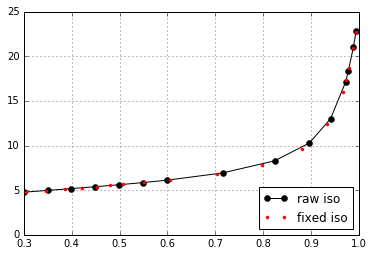

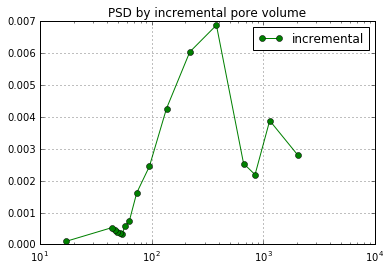

In [7]:
filename = 'pyrolysis_2_93.xlsx'
filename ='test_iso.xlsx'
sheetname = '3_14_650_N2'
gas_type = 'N2'
use_pressure = True
iso_df = pd.read_excel(filename,sheetname=sheetname)
p_measure = np.array(iso_df['p_rels'])
q_measure = np.array(iso_df['q_abs'])
my_BJH = BJH_calculation.BJH_method(p_measure,q_measure,use_pressure=use_pressure,gas_type=gas_type)
my_BJH.do_BJH()
my_BJH.plot_isotherm()
my_BJH.plot_BJH_psd()
print(my_BJH.vpore_total,my_BJH.vpore_micro,my_BJH.vpore_meso)

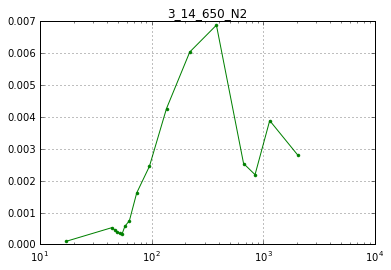

In [9]:
filename = 'pyrolysis_2_93.xlsx'
filename ='test_iso.xlsx'
sheetname = '3_14_650_N2'
gas_type = 'N2'
use_pressure = True
iso_df = pd.read_excel(filename,sheetname=sheetname)
p_measure = np.array(iso_df['p_rels'])
Q_measure = np.array(iso_df['q_abs'])
Davg,Vp,Vp_ccum,Vp_dlogD = BJH_calculation.BJH_main(p_measure,Q_measure,use_pressure=use_pressure,gas_type=gas_type)
figure = plt.figure()
fig,axis = plt.subplots()
axis.set_title(sheetname)
axis.semilogx(Davg[1:],Vp[1:],'g.-')
axis.set_ylim([0,0.007])
plt.grid()

In [76]:
from scipy.interpolate import InterpolatedUnivariateSpline
def get_spline(p_rels,v_stp,order=2):
    s = InterpolatedUnivariateSpline(p_rels,v_stp, k=order)
    return s
def use_my_pressure(p_exp,Q_exp,gas_type='N2'):
    const = BJH_calculation.get_gas_constant(gas_type)
    # predefine the radius 
    radius_s = np.array([8,9,10,11,12,13,14,16,19,27,42,75,140,279,360,460,828,1600])
    # convert radius to pressure
    p_s = BJH_calculation.radius_to_pressure(radius_s,const)
    func_spline = get_spline(p_exp,Q_exp,2)
    # get Q_s from spline function 
    Q_s = func_spline(p_s) 
    return p_s,Q_s

[    8.77873109    10.06860119    11.36474236    13.0433165     15.02559382
    17.40854285    20.37849141    29.31892439    45.76359967    82.4453806
   153.11277931   303.23443184   396.19749277   505.70872984   907.72849544
  1908.97719037]
[ 0.30445319  0.35455676  0.39906515  0.44914481  0.49916705  0.54897325
  0.59911312  0.70041378  0.79602164  0.88106023  0.93408762  0.96615712
  0.97399365  0.97956734  0.98856465  0.99454603]
[ 0.12393476  0.1755204   0.22505092  0.27117254  0.31348618  0.35204369
  0.38709277  0.41895155  0.44794854  0.47439533  0.52074229  0.57725355
  0.6793175   0.77991415  0.870054    0.92814118  0.9632721   0.97141646
  0.97755996  0.98747046  0.99387764]


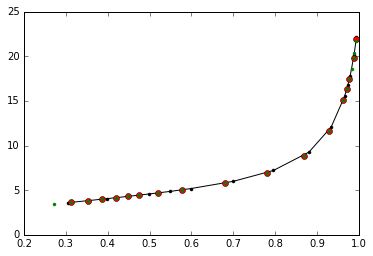

In [65]:
#P_s = np.arange(0.3,1.0,0.05)
p_rels,Q,volume = test_isotherm.shale_3_14()
const = BJH_calculation.get_gas_constant('Ar')
radius = BJH_calculation.kelvin_radius(p_rels,const)
print(radius)
radius_s = np.array([5,6,7,8,9,10,11,12,13,14,16,19,27,42,75,140,279,360,460,828,1700])
p_s = BJH_calculation.radius_to_pressure(radius_s,const)
print(p_rels)
print(p_s)

#Q = np.arange(0.6,1.8,0.2)
#P.any()>0.2
#print(Q)
#P_s = p_rels
func_spline = get_spline(p_rels,Q)
Q_s = func_spline(p_s) 
p_s,Q_s = BJH_calculation.restrict_isotherm( p_s, Q_s, 0.3, 0.9946)
p1,Q1 = use_my_pressure(p_rels,Q,'Ar')
#print(Q_s)
#print(Q)
figure = plt.figure
fig,axis = plt.subplots()
axis.plot(p_rels,Q,'k.-')
axis.plot(p_s,Q_s,'ro')
axis.plot(p1,Q1,'g.')
#axis.set_ylim([0,0.5])
#

#P_s = P1 

#Q_s

[    0.          2032.43606057  1142.16034405   843.27835838   664.90329367
   378.4083863    216.89844916   133.12303105    92.68046076    70.66085925
    60.41767246    54.78312515    51.41113121    48.97934926    46.52419876
    44.04242665    19.12917383     0.        ]


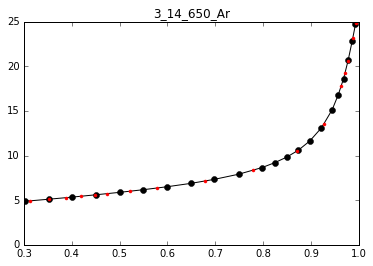

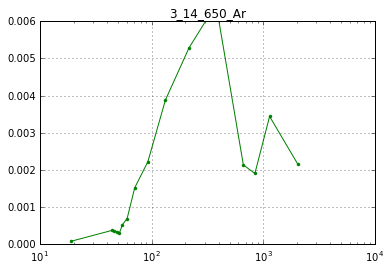

In [77]:
# data reading 
#p = np.array([0.1,0.6,0.9])
#Q = np.array([1,10,12])
filename = 'pyrolysis_2_93.xlsx'
filename ='test_iso.xlsx'
sheetname = '3_14_650_Ar'
gas_type = 'Ar'
force = True

iso_df = pd.read_excel(filename,sheetname=sheetname)
#software_result = pd.read_excel('test_psd.xlsx',sheetname=sheetname)
p_measure = np.array(iso_df['p_rels'])
Q_measure = np.array(iso_df['q_abs'])
#print(p_measure,Q_measure)

if force:
    p,Q = use_my_pressure(p_measure,Q_measure,gas_type)
    p,Q = BJH_calculation.restrict_isotherm( p, Q, 0.3, 0.9946)
else:
    p = p_measure
    Q = Q_measure
Davg,LP,Dp,dV_desorp,k = BJH_calculation.BJH(p,Q,gas_type)
Vp,Vp_ccum,Vp_dlogD = BJH_calculation.result_psd(Davg,LP,Dp,k)

figure = plt.figure()
fig,axis = plt.subplots()
axis.set_title(sheetname)
plt.plot(p_measure,Q_measure,'ko-')
plt.plot(p,Q,'r.')
print(Davg)
figure = plt.figure()
fig,axis = plt.subplots()
axis.set_title(sheetname)
axis.semilogx(Davg[1:],Vp[1:],'g.-')
axis.set_ylim([0,0.006])
#plt.semilogx(Davg[1:],dV_desorp[1:],'r.-')
#plt.semilogx(software_result['D'],software_result['IPV'],'k.-')
#axis
plt.grid()

In [8]:
Vp_output=np.array([0.,0.00330746,0.00375936,0.00180339,0.00218147,0.00640208,0.00562806,0.00436971,0.00254612,
     0.00165767,0.0006482,0.00058069,0.00055073,0.00055514,0.0005072,0.00014844,0.])
P_input = [0.30445319,  0.35455676,  0.39906515,  0.44914481,  0.49916705,  0.54897325,
  0.59911312,  0.70041378,  0.79602164,  0.88106023,  0.93408762,  0.96615712,
  0.97399365,  0.97956734,  0.98856465,  0.99454603]
#Vp1 = np.around(Vp1,8)
#Vp = np.around(Vp,8)
print(max(Vp_output-Vp))

ValueError: operands could not be broadcast together with shapes (17,) (18,) 

In [13]:
import numpy as np

def result_psd(Davg,LP,Dp,k):
    Vp = np.pi*LP*(Davg/2.0)**2 *10**(-16) # return Vp vector[cm^3/g]
    Vp_ccum = np.add.accumulate(Vp)
    Vp_dlogD = np.zeros(len(Vp))
    for i in range(1,k+1):
        Vp_dlogD[i] = Vp[i]/ np.log10(Dp[i]/Dp[i+1])
    return Vp,Vp_ccum,Vp_dlogD